# 6장 군집분석
- Clustering(군집)
    - 비지도학습으로 비슷한 특성을 가지는 데이터들끼리 그룹으로 묶는다.

## 6장-1절. Kmeans Clustering

## KMeans
- K-mean(k평균)
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
    - 거리기반이기 때문에 속성 많을 수록 군집화 정확도 떨어진다 (이를 위해 PCA 해야할 수도 있음)
    - 반복횟수가 많을경우 수행 시간 느려짐
    - 몇개의 군집(cluster)를 선택해야 할지 사용자가 직접 정해주어야 함
- 설명
    - 데이터셋을 k의 군집으로 나눈다. k는 하이퍼파라미터로 사용자가 지정
    - 군집의 중심이 될 것 같은 임의의 지점(centroid)을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 기법
- 하이퍼파라미터
    - n_cluster
        - 군집화할 개수. 즉, 군집 중심점의 개수를 의미
    - init
        - 초기에 군집 중심점의 좌표를 설정할 방식
        - 보통은 k-means++ 방식으로 최초 설정
    - max_iter
        - 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료
- 조회속성
    - labels_
        - 각 데이터 포인가 속한 군짐 중심점 레이블
    - cluster_centers_
        - 각 군집 중심점 좌표
        - 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있음

In [24]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 데이터 불러오기

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width',
                                               'petal_length','petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
from sklearn.preprocessing import StandardScaler

X = irisDF
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---
---

## 01. kmeans 군집분석

In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [62]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

---

### 타겟별로 잘 나뉘었는지 확인

In [63]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = pd.crosstab(index=irisDF['target'],columns=irisDF['cluster'])
iris_result

cluster,0,1,2
target,,,
0,0,50,0
1,2,0,48
2,36,0,14


In [65]:
irisDF.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

## 02. 주성분분석

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)
iris_pca = pca.transform(X_scaled)

In [67]:
pca_columns = ['pca_component1', 'pca_component2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head()

,pca_component1,pca_component2,target
0,-2.848721,0.961230,0
1,-2.724066,-0.383144,0
2,-2.973424,-0.138080,0
3,-2.892192,-0.522087,0
4,-2.951034,1.071927,0


In [68]:
irisDF['pca_1'] = irisDF_pca['pca_component1']
irisDF['pca_2'] = irisDF_pca['pca_component2']

In [69]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,1,-2.848721,0.961230
1,4.9,3.0,1.4,0.2,0,1,-2.724066,-0.383144
2,4.7,3.2,1.3,0.2,0,1,-2.973424,-0.138080
3,4.6,3.1,1.5,0.2,0,1,-2.892192,-0.522087
4,5.0,3.6,1.4,0.2,0,1,-2.951034,1.071927


## 두 주성분으로 잘 군집되었는지 확인

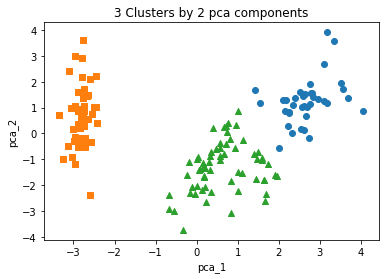

In [70]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_ind,'pca_1'], y=irisDF.loc[marker0_ind,'pca_2'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_1'], y=irisDF.loc[marker1_ind,'pca_2'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_1'], y=irisDF.loc[marker2_ind,'pca_2'],marker='^')

plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('3 Clusters by 2 pca components')
plt.show()

Text(0.5, 1.0, 'Predicted')

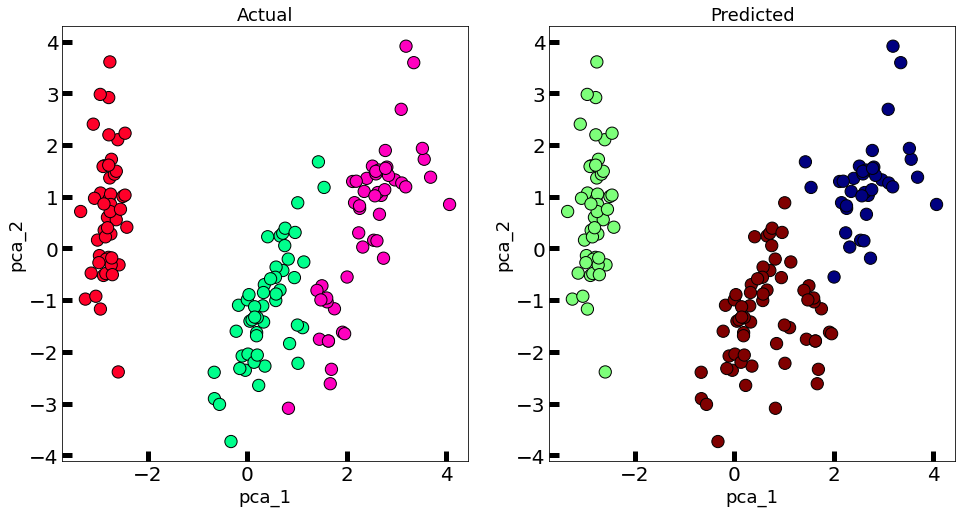

In [71]:
# Plot the identified clusters and compare with the answers

f, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].scatter(irisDF['pca_1'], irisDF['pca_2'], c=iris.target, cmap='gist_rainbow',edgecolor='k', s=150)
ax[1].scatter(irisDF['pca_1'], irisDF['pca_2'], c=kmeans.labels_, cmap='jet',edgecolor='k', s=150)
ax[0].set_xlabel('pca_1', fontsize=18)
ax[0].set_ylabel('pca_2', fontsize=18)
ax[1].set_xlabel('pca_1', fontsize=18)
ax[1].set_ylabel('pca_2', fontsize=18)
ax[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
ax[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
ax[0].set_title('Actual', fontsize=18)
ax[1].set_title('Predicted', fontsize=18)

---
---

## Kmeans 실습

### 01. 데이터 불러오기

In [45]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
   n_samples=200, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

print(X.shape, y.shape)
np.unique(y,return_counts=True)

(200, 2) (200,)


(array([0, 1, 2]), array([67, 67, 66], dtype=int64))

In [46]:
clusterDF = pd.DataFrame(data=X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.630356,3.357972,2
1,0.802314,4.381962,0
2,1.053744,4.492869,0
3,-1.478042,3.209359,2
4,1.125389,4.966980,0


### 02. kemans clustering

In [47]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

cluster_labels = kmeans.fit_predict(X)

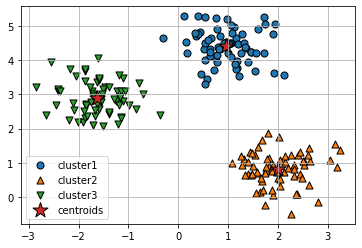

In [48]:
plt.scatter(
    X[cluster_labels==0,0], X[cluster_labels==0,1],
    s=50,marker='o',
    edgecolor='black',
    label='cluster1')
plt.scatter(
    X[cluster_labels==1,0], X[cluster_labels==1,1],
    s=50,marker='^',
    edgecolor='black',
    label='cluster2')
plt.scatter(
    X[cluster_labels==2,0], X[cluster_labels==2,1],
    s=50,marker='v',
    edgecolor='black',
    label='cluster3')

plt.scatter(
    kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
    s=250, marker='*',
    edgecolor='black',
    label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

---

### 03.  Inertia value를 이용한 적정 군집수 판단
- inertia
    - 군집내 데이터들과 중심간의 거리의 합으로 군집의 응집도를 나타내는 값
    - 값이 작을 수록 응집도가 높게 군집화가 잘되어 있다고 평가할 수 있다.
    - KMean의 inertia_ 속성으로 조회할 수 있다.
    - 군집 단위 별로 inertia 값을 조회한 후 급격히 떨어지는 지점이 적정 군집수라 판단할 수 있다.

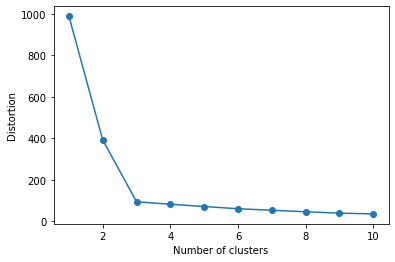

In [52]:
distortions = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

---

### 04. 평가 - 실루엣 지표
- 실루엣 계수 (silhouette coefficient)
    - 개별 관측치가 해당 군집 내의 데이터와 얼마나 가깝고 가장 가까운 다른 군집과 얼마나 먼지를 나타내는 지표
    - -1 ~ 1 사이의 값을 가지며 1에 가까울 수록 좋은 지표이다.
        - 1에 가까우면 자신이 속한 군집에 잘 속해있다는 의미 (중심가까이 있다.)
        - 0에 가까우면 군집의 경계에 위치한다는 의미
        - -1에 가까우면 잘못된 클러스터에 할당되어 있다는 의미
- silhouette_samples()
    - 개별 관측치의 실루엣 계수 반환
- silhouette_score()
    - 실루엣 계수들의 평균
- 좋은 군집화의 지표
    - 실루엣 계수 평균이 1에 가까울수록 좋다.
    - 실루엣 계수 평균과 개별 군집의 실루엣 계수 평균의 편차가 크지 않아야 한다.

In [ ]:
cluster_labels = kmeans.fit_predict(X)

In [56]:
# 평가
from sklearn.metrics import silhouette_samples, silhouette_score

s_coefs = silhouette_samples(X,cluster_labels)

s_mean = silhouette_score(X,cluster_labels)
print(s_mean)

0.7288999319569544


In [58]:
clusterDF['label'] = cluster_labels
clusterDF['silhouette'] = s_coefs
clusterDF.head()

,ftr1,ftr2,target,label,silhouette
0,-1.630356,3.357972,2,2,0.737650
1,0.802314,4.381962,0,0,0.780213
2,1.053744,4.492869,0,0,0.799967
3,-1.478042,3.209359,2,2,0.751596
4,1.125389,4.966980,0,0,0.758606


In [59]:
clusterDF.groupby('label')['silhouette'].mean()

label
0    0.703943
1    0.766578
2    0.715986
Name: silhouette, dtype: float64